<a href="https://colab.research.google.com/github/Rafiqahh/APM_KLP10/blob/main/Multiple_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Reading the dataset
dataset = pd.read_csv ("insurance.csv") 
dataset.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# New Section

In [10]:
#Setting the value for X and Y
x = dataset[['age', 'bmi', 'children']]
y = dataset['charges']

# New Section

In [15]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

# New Section

In [18]:
#Fitting the Multiple Linear Regression model

from sklearn.linear_model import LinearRegression
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [19]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  -6524.650328761092
Coefficients:


[('age', 249.78618064456487),
 ('bmi', 303.9576039911431),
 ('children', 519.8446080286104)]

In [20]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)

#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [ 9676.57340336  9867.8860551  12868.84958193  8033.57950569
  5623.63360332 17643.66298656 19021.02882992  7585.93719558
 10697.89641019 20378.19953174 20179.21011122 10036.40237202
 15620.824894    9018.06729344 14415.09204881 13292.07151216
 16459.43897473 18010.34313028 12008.41752356 22875.10820043
 18849.08668747  8173.9409489  11212.82158556 12484.93532057
 18400.25943852 13317.83080329 11240.10042671 20291.6487198
 12763.59747359 18056.50438262 23273.47209149  7220.49291502
 19907.58024803  7616.07569748 13594.81847241 16315.44536232
 13291.45346158 13632.63301961  8707.69568819 19366.25202606
 12827.8924106  17047.26185127 10450.78949898 13392.37752147
  5594.75763094 10262.00093533 10393.78459579  8837.62447345
  7096.38529986 15922.43856321 21817.00088936 12395.31971318
 10223.97956847 12946.95087864 12176.34124732 18864.90261825
 18206.73135751 12210.44628212 13119.02177407 17244.1905384
  8559.03942563  8210.95680675 10797.01748067 14927.28655442
 

In [22]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
12,1826.84300,9676.573403
306,20177.67113,9867.886055
318,7421.19455,12868.849582
815,1877.92940,8033.579506
157,15518.18025,5623.633603


In [23]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 11.97
Mean Absolute Error: 8899.594165897634
Mean Square Error: 129209552.77458598
Root Mean Square Error: 11367.037994771812


Text(0.5, 1.0, 'Actual vs. Predicted')

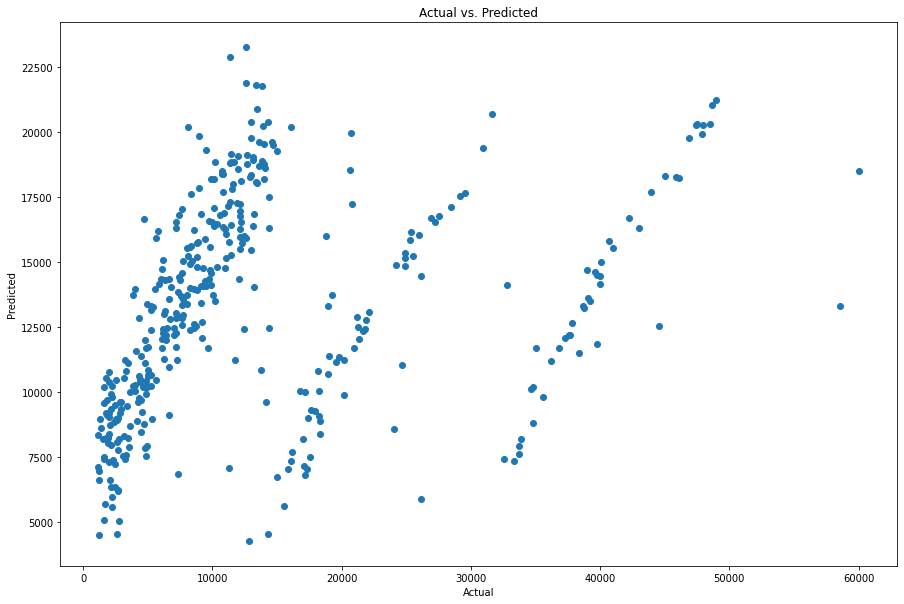

In [32]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred_mlr)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')